**Function 2: Optimising Noisy Models**

This corresponds to trying to optimise an unknown machine learning model. However, the initialization of the model is very important, meaning your observations will be very noisy, and the problem might have a lot of local optima! You are trying to make the model’s log-likelihood as large as possible.

In [4]:
import numpy as np

from get_init_data import get_inputs, get_outputs

f_num = 2

X_init = get_inputs(f_num)
y_init = get_outputs(f_num)
# print(X_init)
# print(y_init)

In [6]:
from get_query_data import get_inputs, get_outputs

X_q = get_inputs(f_num)
y_q = get_outputs(f_num)
# print(X_q)
# print(y_q)

[0.431257, 0.895431]
[0.821456, 0.390248]
[0.19432, 0.682014, 0.011249]
[0.129382, 0.503612, 0.777124, 0.041672]
[0.964301, 0.306598, 0.758164, 0.118309]
[0.338127, 0.072341, 0.600298, 0.901134, 0.244792]
[0.120936, 0.893025, 0.516204, 0.032114, 0.74219, 0.28831]
[0.024893, 0.310587, 0.498236, 0.865901, 0.702134, 0.139804, 0.603781, 0.003172]
[0.431257, 0.895431]
[0.821456, 0.390248]
[0.19432, 0.682014, 0.011249]
[0.129382, 0.503612, 0.777124, 0.041672]
[0.964301, 0.306598, 0.758164, 0.118309]
[0.338127, 0.072341, 0.600298, 0.901134, 0.244792]
[0.120936, 0.893025, 0.516204, 0.032114, 0.74219, 0.28831]
[0.024893, 0.310587, 0.498236, 0.865901, 0.702134, 0.139804, 0.603781, 0.003172]
[0.557814, 0.91103]
[0.423839, 0.177067]
[0.939684, 0.438755, 0.426575]
[0.439915, 0.427314, 0.95773, 0.471256]
[0.297493, 0.25993, 0.547059, 0.410727]
[0.848123, 0.282866, 0.002497, 0.54845, 0.964839]
[0.24578, 0.13368, 0.704378, 0.80709, 0.748982, 0.40143]
[0.389062, 0.327444, 0.27934, 0.140607, 0.299915, 0

In [8]:
from get_init_data2 import get_inputs, get_outputs

X_init2 = get_inputs(f_num)
y_init2 = get_outputs(f_num)
# print(X_init2)
# print(y_init2)

In [10]:
X = np.concatenate((X_init, X_q, X_init2), axis=0)
y = np.concatenate((y_init, y_q, y_init2), axis=0)

for i, v in enumerate(X):
    print(str(v) + ":" + str(y[i]))
# print("INPUTS")
# print(X)
# print("OUTPUTS")
# print(y)

[0.6657995800131589 0.12396912767534907]:0.5389961189269181
[0.8777909889953304 0.7786275008473289]:0.42058623962798264
[0.14269907423594608 0.34900513057320015]:-0.06562362443733738
[0.8452754286767249 0.7111202665952655]:0.293992912410866
[0.45464714105124415 0.2904551797740609]:0.2149645101004509
[0.5777128444074784 0.7719731841154063]:0.023105549798190586
[0.4381660616117107 0.6850182567997548]:0.24461934400448035
[0.34174959302885033 0.028697719822277867]:0.0387490151561584
[0.33864815688701766 0.21386724563864368]:-0.013857618149729824
[0.7026365569244406 0.9265641975455574]:0.6112052157614438
[0.821456 0.390248]:0.13421137777698888
[0.821456 0.390248]:0.024520237406423742
[0.423839 0.177067]:0.07266121884478781
[0.822856 0.679011]:0.08406318919930555
[0.901716 0.98795]:0.07283226448458861
[0.901716 0.98795]:0.011050651820761991
[0.661856 0.017207]:0.41771588538101045
[0.617348 0.403533]:0.17813635747582568
[0.099846 0.644124]:0.03958619032260913
[0.619987 0.132171]:0.26862019959

In [12]:
from skopt import Optimizer
from skopt.space import Real
import numpy as np

def expensive_log_likelihood(x):
    """
    Simulated noisy function with multiple local optima.
    x: array-like of shape (2,)
    """
    x = np.array(x)
    # Example: a mixture of RBF bumps plus Gaussian noise
    value = (
        np.exp(-5 * np.sum((x - np.array([0.25, 0.25]))**2)) +
        0.8 * np.exp(-10 * np.sum((x - np.array([0.75, 0.75]))**2))
    )
    noise = np.random.normal(0, 0.05)  # Add noise
    return value + noise


# Define search space
space = [Real(0.0, 1.0), Real(0.0, 1.0)]

# Initialize optimizer
opt = Optimizer(dimensions=space, base_estimator="GP", acq_func="EI")

# Tell optimizer about existing data
opt.tell(X.tolist(), y.tolist())

# Suggest new point(s)
for _ in range(10):
    next_x = opt.ask()
    next_y = expensive_log_likelihood(next_x)  # your evaluation function
    opt.tell(next_x, next_y)


In [13]:
opt.get_result()

          fun: -0.06562362443733738
            x: [0.14269907423594608, 0.34900513057320015]
    func_vals: [ 5.390e-01  4.206e-01 ...  6.455e-01  9.269e-01]
      x_iters: [[0.6657995800131589, 0.12396912767534907], [0.8777909889953304, 0.7786275008473289], [0.14269907423594608, 0.34900513057320015], [0.8452754286767249, 0.7111202665952655], [0.45464714105124415, 0.2904551797740609], [0.5777128444074784, 0.7719731841154063], [0.4381660616117107, 0.6850182567997548], [0.34174959302885033, 0.028697719822277867], [0.33864815688701766, 0.21386724563864368], [0.7026365569244406, 0.9265641975455574], [0.821456, 0.390248], [0.821456, 0.390248], [0.423839, 0.177067], [0.822856, 0.679011], [0.901716, 0.98795], [0.901716, 0.98795], [0.661856, 0.017207], [0.617348, 0.403533], [0.099846, 0.644124], [0.619987, 0.132171], [0.619987, 0.132171], [0.757665, 0.674401], [0.619987, 0.132171], [0.988468, 0.263315], [0.63385, 0.763299], [0.483927, 0.58374], [0.3316259364531835, 0.08049910699326579], [0.10

In [14]:
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, RBF
from matplotlib import cm


kernel_v1 = ConstantKernel(1.0, (1e-3, 1e3)) * Matern(length_scale=0.2, nu=2.5) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-5, 1e1))


gp_v1 = GaussianProcessRegressor(kernel=kernel_v1, n_restarts_optimizer=10, random_state=42)
gp_v1.fit(X, y)


GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=0.2, nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=10, random_state=42)

In [18]:
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid_points = np.vstack((xx.ravel(), yy.ravel())).T
grid_points

array([[0.        , 0.        ],
       [0.01010101, 0.        ],
       [0.02020202, 0.        ],
       ...,
       [0.97979798, 1.        ],
       [0.98989899, 1.        ],
       [1.        , 1.        ]])

In [20]:
mean_prediction, std_prediction = gp_v1.predict(grid_points, return_std=True)
mean_prediction

array([ 0.00710264,  0.00800196,  0.00898665, ..., -0.01352393,
       -0.01431514, -0.01453442])

In [22]:
std_prediction

array([0.29540704, 0.29503548, 0.29458778, ..., 0.20684676, 0.22003806,
       0.23178327])

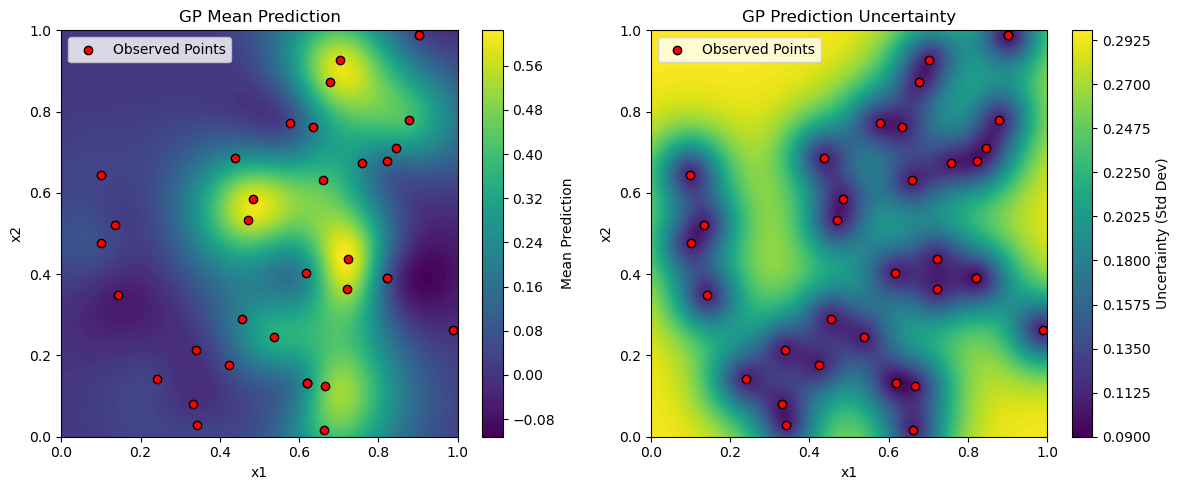

In [24]:

mean_prediction = mean_prediction.reshape(xx.shape)
std_prediction = std_prediction.reshape(xx.shape)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, mean_prediction, levels=100, cmap=cm.viridis)
plt.colorbar(label="Mean Prediction")
plt.scatter(X[:, 0], X[:, 1], c='red', edgecolor='k', label='Observed Points')
plt.title("GP Mean Prediction")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, std_prediction, levels=100, cmap=cm.viridis)
plt.colorbar(label="Uncertainty (Std Dev)")
plt.scatter(X[:, 0], X[:, 1], c='red', edgecolor='k', label='Observed Points')
plt.title("GP Prediction Uncertainty")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.tight_layout()
plt.show()

In [26]:


# Let's use a new kernal , why? RBF for smoothness, WhiteKernel for noise
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)

gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)
gpr.fit(X, y)
predictions, std_devs = gpr.predict(X, return_std=True)

print("Predictions:", predictions)
print("Standard Deviations:", std_devs)

Predictions: [ 0.28913994  0.21608213 -0.01570733  0.2528318   0.25605909  0.38541329
  0.36056111  0.0634345   0.13447875  0.33215397  0.28222112  0.28222112
  0.19380023  0.27380925  0.16068194  0.16068194  0.2669818   0.3406302
  0.08719444  0.28242276  0.28242276  0.31927121  0.28242276  0.16338776
  0.37337307  0.35476185  0.07296165  0.0024568   0.3508914   0.06466991
  0.28433123  0.36276959  0.33845963  0.32308764  0.32967035 -0.00093784]
Standard Deviations: [0.19797662 0.20003717 0.20416692 0.19768253 0.19439183 0.19862577
 0.19990028 0.20674837 0.19635851 0.20377034 0.19781526 0.19781526
 0.19494423 0.19660428 0.21255192 0.21255192 0.20865196 0.19435707
 0.21743203 0.19620989 0.19620989 0.19446399 0.19620989 0.22211461
 0.19614357 0.1962463  0.20225991 0.20702219 0.20009757 0.20464786
 0.19366172 0.19426874 0.19593965 0.19458616 0.19474527 0.20458237]


              x1         x2          y
count  36.000000  36.000000  36.000000
mean    0.577152   0.459548   0.235531
std     0.242545   0.287098   0.226267
min     0.099846   0.017207  -0.065624
25%     0.434584   0.204667   0.037504
50%     0.619987   0.420776   0.192373
75%     0.731467   0.680513   0.418433
max     0.988468   0.987950   0.694832
Duplicate inputs (X):
Number of duplicates: 4
          x1        x2         y
11  0.821456  0.390248  0.024520
15  0.901716  0.987950  0.011051
20  0.619987  0.132171  0.132911
22  0.619987  0.132171  0.325306
Does duplicates inputs have consistent outputs:
Input (0.619987, 0.132171) has outputs: [0.2686202  0.13291065 0.32530625]
Output variance: 0.009774409268619501
Input (0.821456, 0.390248) has outputs: [0.13421138 0.02452024]
Output variance: 0.006016073137897512
Input (0.901716, 0.98795) has outputs: [0.07283226 0.01105065]
Output variance: 0.001908483831671551


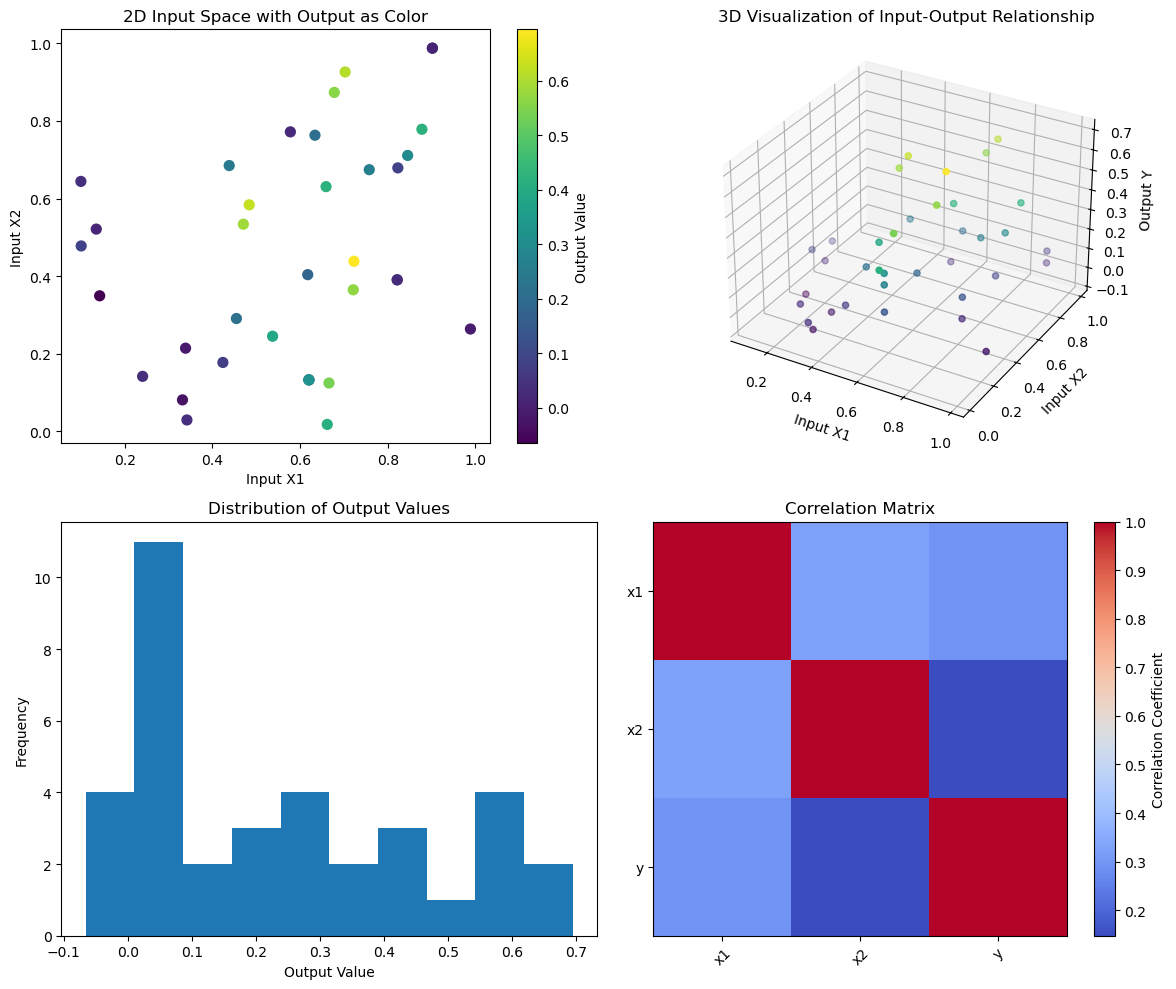

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

df = pd.DataFrame({
    'x1': [row[0] for row in X],
    'x2': [row[1] for row in X],
    'y': y
})
print(df.describe())

print("Duplicate inputs (X):")
duplicates = df.duplicated(subset=['x1', 'x2'])
print(f"Number of duplicates: {duplicates.sum()}")
print(df[duplicates])


print("Does duplicates inputs have consistent outputs:")
for (x1, x2), group in df.groupby(['x1', 'x2']):
    if len(group) > 1:
        print(f"Input ({x1}, {x2}) has outputs: {group['y'].values}")
        print(f"Output variance: {group['y'].var()}")

# Visualize the data
plt.figure(figsize=(12, 10))

# 2D scatter plot with color representing output value
plt.subplot(2, 2, 1)
scatter = plt.scatter(df['x1'], df['x2'], c=df['y'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Output Value')
plt.xlabel('Input X1')
plt.ylabel('Input X2')
plt.title('2D Input Space with Output as Color')

# 3D surface plot
plt.subplot(2, 2, 2, projection='3d')
ax = plt.gca()
ax.scatter(df['x1'], df['x2'], df['y'], c=df['y'], cmap='viridis')
ax.set_xlabel('Input X1')
ax.set_ylabel('Input X2')
ax.set_zlabel('Output Y')
ax.set_title('3D Visualization of Input-Output Relationship')

# Output distribution
plt.subplot(2, 2, 3)
plt.hist(df['y'], bins=10)
plt.xlabel('Output Value')
plt.ylabel('Frequency')
plt.title('Distribution of Output Values')

# Correlation analysis
plt.subplot(2, 2, 4)
correlation_matrix = df.corr()
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')

plt.tight_layout()


In [30]:

from ba_optimizer_v1 import BayesianOptimizer


optimizer = BayesianOptimizer(np.array(X, dtype=np.float64), y, bounds=(0, 1))

# Perform optimization step
submission_data = optimizer.optimize_step(
    num_candidates=2000,
    acquisition_func='ucb',
    kappa=2.5  # Higher kappa for more exploration in noisy setting
)

print("\n" + "="*60)
print("TOP 5 RECOMMENDED POINTS:")
print("="*60)

for i, (point, acq_val) in enumerate(zip(
    submission_data['top_k_points'], 
    submission_data['top_k_acquisitions']
)):
    mean, std = submission_data['gp_predictions']
    print(f"{i+1}. Point: ({point[0]:.4f}, {point[1]:.4f})")
    print(f"   UCB: {acq_val:.4f}, GP: {mean[i]:.4f} ± {std[i]:.4f}")
    print()


# Re-optimize with updated data
new_submission = optimizer.optimize_step(
    num_candidates=1000,
    acquisition_func='ei',
    kappa=2.0
)

print(f"\nNEW RECOMMENDATION: {new_submission['best_point']}")
print(f"UCB Score: {new_submission['best_acquisition']:.4f}")

BAYESIAN OPTIMIZATION STEP
1. Computing function metrics...
   Current best: 0.6948
   Dataset size: 36
   Estimated noise: 0.0502

2. Updating surrogate model...
GP fitted with kernel: 0.954**2 * RBF(length_scale=0.0729) + WhiteKernel(noise_level=0.12)
Log-marginal likelihood: -44.8409

3. Generating 2000 candidate samples...
4. Computing UCB acquisition function...
5. Selecting best points for submission...

RECOMMENDED NEXT POINT:
Location: [0.70905582 0.51453517]
Acquisition: 0.9532
GP Prediction: 0.4881 ± 0.1860

TOP 5 RECOMMENDED POINTS:
1. Point: (0.7091, 0.5145)
   UCB: 0.9532, GP: 0.4881 ± 0.1860

2. Point: (0.7349, 0.1045)
   UCB: 0.9466, GP: 0.4962 ± 0.1802

3. Point: (0.7337, 0.1057)
   UCB: 0.9455, GP: 0.4991 ± 0.1786

4. Point: (0.7355, 0.1136)
   UCB: 0.9444, GP: 0.4953 ± 0.1796

5. Point: (0.6862, 0.5134)
   UCB: 0.9423, GP: 0.4676 ± 0.1899

BAYESIAN OPTIMIZATION STEP
1. Computing function metrics...
   Current best: 0.6948
   Dataset size: 36
   Estimated noise: 0.0502

Max y is  0.6948320857901906 at:  [0.7227338005571111 0.43801822279820257]


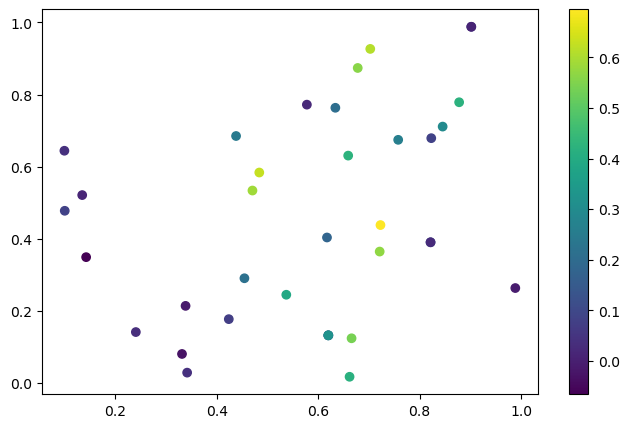

In [32]:
y_max = np.max(y)
print("Max y is ", y_max, "at: ", X[np.where(y == y_max)][0])

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

In [34]:
from scipy.stats import norm
######## Acquisition Function 1 - Upper Confidence Bound ##########
x1 = np.linspace(X[np.where(y == y_max)][0][0]-0.07, X[np.where(y == y_max)][0][0]+0.07, 2000)
x2 = np.linspace(X[np.where(y == y_max)][0][1]-0.07, X[np.where(y == y_max)][0][1]+0.07, 2000)
X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        X_grid.append([x1[i], x2[j]])
X_grid = np.array(X_grid)

mean, std = gpr.predict(X_grid, return_std = True)

ucb1 = mean + 0.86 * std

idx_max = np.argmax(ucb1)
UB_NextQuery = X_grid[idx_max]

print("UCB - Next Query - Idea 1: ", UB_NextQuery)

########## Acquisition Function 2 - Probability of Improvement###########################
def compute_pi(x):
    mu, sigma = gpr.predict(X_grid, return_std = True)
    z = (mu - y_max) / sigma
    pi = norm.cdf(z)
    return pi

pi_values = compute_pi(X_grid)

next_idx = np.argmax(pi_values)
PI_NextQuery = X_grid[next_idx]

print("PI - Next Query: ", PI_NextQuery)

################# Acquisition Function 3 - Expected Improvement##################
def compute_expected_improvement(x):
    mu, sigma = gpr.predict([x], return_std=True)
    f_best = np.max(y)
    z = (mu - f_best) / sigma
    ei = (mu - f_best) * norm.cdf(z) + sigma * norm.pdf(z)
    return ei

x1 = np.linspace(X[np.where(y == y_max)][0][0]-0.1, X[np.where(y == y_max)][0][0]+0.07, 1000)
x2 = np.linspace(X[np.where(y == y_max)][0][1]-0.1, X[np.where(y == y_max)][0][1]+0.07, 1000)
X_grid = np.array([[a, b] for a in x1 for b in x2])

ei_values = [compute_expected_improvement(x) for x in X_grid]

next_idx = np.argmax(ei_values)
EI_NextQuery = X_grid[next_idx]

print("Expected Improvement - Next Query: ", EI_NextQuery)

KeyboardInterrupt: 

In [36]:
from ba_optimizer_v2 import BayesianOptimizer as BayesianOptimizer_v2

X = np.array(X, dtype=np.float64)

optimizer_v2 = BayesianOptimizer_v2(X, y, bounds=(0, 1))

kernel = ConstantKernel(0.1, (1e-3, 1e1)) * RBF(length_scale=0.5, length_scale_bounds=(1e-2, 1e0)) + WhiteKernel(noise_level=1e-4, noise_level_bounds=(1e-5, 1e-2))

new_submission = optimizer_v2.optimize_step(
    num_candidates=100000,
    acquisition_func='ei',
    kappa=1.0, kernel=kernel
)

print(f"\n optimizer_v2 NEW RECOMMENDATION: {new_submission['best_point']}")
print(f"optimizer_v2 UCB Score: {new_submission['best_acquisition']:.4f}")

BAYESIAN OPTIMIZATION STEP
1. Computing function metrics...
   Current best: 0.6948
   Dataset size: 36
   Estimated noise: 0.0502

2. Updating surrogate model...
GP fitted with kernel: 1**2 * RBF(length_scale=0.0652) + WhiteKernel(noise_level=0.01)
Log-marginal likelihood: -65.1668

3. Generating 100000 candidate samples...
4. Computing EI acquisition function...
5. Selecting best points for submission...

RECOMMENDED NEXT POINT:
Location: [0.71912741 0.09853779]
Acquisition: 0.0185
GP Prediction: 0.5826 ± 0.1458

 optimizer_v2 NEW RECOMMENDATION: [0.71912741 0.09853779]
optimizer_v2 UCB Score: 0.0185


# Calcualting after 27 May outputs

Max y is  0.6948320857901906 at:  [0.7227338  0.43801822]


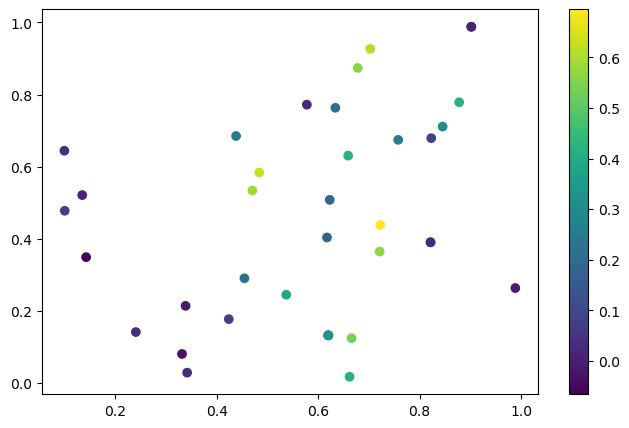

In [39]:

input_may_27 = np.array([0.622733, 0.508018])
output_may_27 = np.float64(0.1874561028603443)

X = np.append(X, np.array([input_may_27], dtype=np.float64), axis=0)
y = np.append(y, output_may_27)

y_max = np.max(y)
print("Max y is ", y_max, "at: ", X[np.where(y == y_max)][0])

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()


In [41]:
optimizer.add_observation(input_may_27, output_may_27)

# Re-optimize with updated data
new_submission = optimizer.optimize_step(
    num_candidates=100000,
    acquisition_func='ucb',
    kappa=1.0
)

print(f"\n optimizer1 NEW RECOMMENDATION: {new_submission['best_point']}")
print(f"optimizer1 UCB Score: {new_submission['best_acquisition']:.4f}")

optimizer_v2.add_observation(input_may_27, output_may_27)


kernel = ConstantKernel(0.1, (1e-3, 1e1)) * RBF(length_scale=0.5, length_scale_bounds=(1e-2, 1e0)) + WhiteKernel(noise_level=1e-4, noise_level_bounds=(1e-5, 1e-2))

new_submission = optimizer_v2.optimize_step(
    num_candidates=100000,
    acquisition_func='ucb',
    kappa=1.0, kernel=kernel
)

print(f"\n optimizer_v2 NEW RECOMMENDATION: {new_submission['best_point']}")
print(f"optimizer_v2 UCB Score: {new_submission['best_acquisition']:.4f}")

Added observation: [0.622733 0.508018] -> 0.1875
BAYESIAN OPTIMIZATION STEP
1. Computing function metrics...
   Current best: 0.6948
   Dataset size: 37
   Estimated noise: 0.0502

2. Updating surrogate model...
GP fitted with kernel: 0.947**2 * RBF(length_scale=0.0697) + WhiteKernel(noise_level=0.121)
Log-marginal likelihood: -46.3928

3. Generating 100000 candidate samples...
4. Computing UCB acquisition function...
5. Selecting best points for submission...

RECOMMENDED NEXT POINT:
Location: [0.71726416 0.42311987]
Acquisition: 0.7427
GP Prediction: 0.6402 ± 0.1025

 optimizer1 NEW RECOMMENDATION: [0.71726416 0.42311987]
optimizer1 UCB Score: 0.7427
Added observation: [0.622733 0.508018] -> 0.1875
BAYESIAN OPTIMIZATION STEP
1. Computing function metrics...
   Current best: 0.6948
   Dataset size: 37
   Estimated noise: 0.0502

2. Updating surrogate model...
GP fitted with kernel: 1**2 * RBF(length_scale=0.064) + WhiteKernel(noise_level=0.01)
Log-marginal likelihood: -67.3252

3. Gen

In [42]:
print(f"\n\n optimizer acquisition_func='ei'")
optimizer.optimize_step(
    num_candidates=100000,
    acquisition_func='ei'
)


print(f"\n\n optimizer_v2 acquisition_func='ei'")
kernel = ConstantKernel(0.1, (1e-3, 1e1)) * RBF(length_scale=0.5, length_scale_bounds=(1e-2, 1e0)) + WhiteKernel(noise_level=1e-4, noise_level_bounds=(1e-5, 1e-2))

optimizer_v2.optimize_step(
    num_candidates=100000,
    acquisition_func='ei',
    kernel=kernel)



 optimizer acquisition_func='ei'
BAYESIAN OPTIMIZATION STEP
1. Computing function metrics...
   Current best: 0.6948
   Dataset size: 37
   Estimated noise: 0.0502

2. Updating surrogate model...
GP fitted with kernel: 0.947**2 * RBF(length_scale=0.0697) + WhiteKernel(noise_level=0.121)
Log-marginal likelihood: -46.3928

3. Generating 100000 candidate samples...
4. Computing EI acquisition function...
5. Selecting best points for submission...

RECOMMENDED NEXT POINT:
Location: [0.71726416 0.42311987]
Acquisition: 0.0193
GP Prediction: 0.6402 ± 0.1025


 optimizer_v2 acquisition_func='ei'
BAYESIAN OPTIMIZATION STEP
1. Computing function metrics...
   Current best: 0.6948
   Dataset size: 37
   Estimated noise: 0.0502

2. Updating surrogate model...
GP fitted with kernel: 1**2 * RBF(length_scale=0.064) + WhiteKernel(noise_level=0.01)
Log-marginal likelihood: -67.3252

3. Generating 100000 candidate samples...
4. Computing EI acquisition function...
5. Selecting best points for submiss

{'best_point': array([0.71408437, 0.41657047]),
 'best_acquisition': 0.01989365318033812,
 'top_k_points': array([[0.71408437, 0.41657047],
        [0.71369228, 0.41707954],
        [0.71440919, 0.41839242],
        [0.71646672, 0.4150529 ],
        [0.71290092, 0.41663038]]),
 'top_k_acquisitions': array([0.01989365, 0.01986961, 0.01986069, 0.01979276, 0.01978954]),
 'gp_predictions': (array([0.69127964, 0.69120467, 0.69271767, 0.69191543, 0.68998844]),
  array([0.05420195, 0.05423075, 0.05239074, 0.05318864, 0.05546426])),
 'current_best_observed': 0.6948320857901906,
 'current_best_point': array([0.7227338 , 0.43801822])}

# Calcualting after 2 Jun outputs

Max y is  0.6948320857901906 at:  [0.7227338  0.43801822]


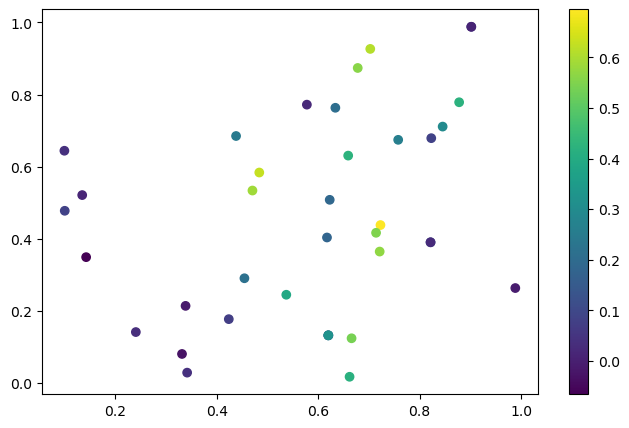

In [46]:
input_jun_2 = np.array([np.float64(0.714084), np.float64(0.41657)])
output_jun_2 = np.float64(0.5482950608185074)

X = np.append(X, np.array([input_jun_2], dtype=np.float64), axis=0)
y = np.append(y, output_jun_2)

y_max = np.max(y)
print("Max y is ", y_max, "at: ", X[np.where(y == y_max)][0])

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

In [48]:
optimizer_v2.add_observation(input_jun_2, output_jun_2)

print(f"\n\n optimizer_v2 acquisition_func='ei'")

optimizer_v2.optimize_step(
    num_candidates=100000,
    acquisition_func='ei',
    kernel=kernel
)

Added observation: [0.714084 0.41657 ] -> 0.5483


 optimizer_v2 acquisition_func='ei'
BAYESIAN OPTIMIZATION STEP
1. Computing function metrics...
   Current best: 0.6948
   Dataset size: 38
   Estimated noise: 0.0502

2. Updating surrogate model...
GP fitted with kernel: 0.994**2 * RBF(length_scale=0.0521) + WhiteKernel(noise_level=0.01)
Log-marginal likelihood: -68.6256

3. Generating 100000 candidate samples...
4. Computing EI acquisition function...
5. Selecting best points for submission...

RECOMMENDED NEXT POINT:
Location: [0.73802086 0.46440249]
Acquisition: 0.0647
GP Prediction: 0.7435 ± 0.0882


{'best_point': array([0.73802086, 0.46440249]),
 'best_acquisition': 0.06473142411518666,
 'top_k_points': array([[0.73802086, 0.46440249],
        [0.73487231, 0.46949094],
        [0.73703672, 0.46941202],
        [0.73312092, 0.46536699],
        [0.73631849, 0.46276295]]),
 'top_k_acquisitions': array([0.06473142, 0.06472737, 0.06470843, 0.06447329, 0.06433328]),
 'gp_predictions': (array([0.74347971, 0.73914573, 0.73798329, 0.74490364, 0.74586194]),
  array([0.088201  , 0.09673221, 0.09884591, 0.08442755, 0.08190059])),
 'current_best_observed': 0.6948320857901906,
 'current_best_point': array([0.7227338 , 0.43801822])}